# Código

## Importação das bibliotecas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Silenciando todos os avisos

In [23]:
import warnings
warnings.filterwarnings("ignore")  # Isso irá silenciar todos os avisos

Alterando as configurações do pandas

In [60]:
pd.set_option('display.float_format', '{:.2f}'.format)  # Formata os números com duas casas decimais

## Análise dos Dados

### Leitura dos dados

In [25]:
metadados = pd.read_excel('base_plano_de_saude.xlsx')
metadados

,Variável,Descrição
0,Idade,Idade do colaborador
1,Sexo,Sexo do colaborador
2,IMC,Índice de Massa Corporal do colaborador
3,Qte_Filhos,Qte de filhos que o colaborador tem
4,Fumante,Flag se o colaborador é fumante ou não fumante
5,Região,Região do Brasil onde o colaborador mora
6,Custo_Saude,Custo de Plano de Saúde que esse colaborador t...


O dataframe `metadados` identifica as variáveis de nosso dataset `base`

In [26]:
df = pd.read_excel('base_plano_de_saude.xlsx', sheet_name='base')
df.head()

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude
0,19,Feminino,27.90,0,Sim,Centro,1688.49
1,18,Masculino,33.77,1,Não,Sudeste,172.56
2,28,Masculino,33.00,3,Não,Sudeste,444.95
3,33,Masculino,22.70,0,Não,Norte,2198.45
4,32,Masculino,28.88,0,Não,Norte,386.69


Nosso dataframe com os dados da empresa.

Podemos notar que os nomes das colunas estão listados na saída.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Idade        1338 non-null   int64  
 1   Sexo         1338 non-null   object 
 2   IMC          1338 non-null   float64
 3   Qte_Filhos   1338 non-null   int64  
 4   Fumante      1338 non-null   object 
 5   Região       1338 non-null   object 
 6   Custo_Saude  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
# Transformando variaveis categóricas para o tipo "category"
df[['Sexo', 'Fumante', 'Região']] = df[['Sexo', 'Fumante', 'Região']].astype('category')

De acordo com a saída do código, temos:

- 1338 linhas (ou entradas)
- 7 colunas (ou características)
- Aparentemente não temos nenhum número nulo

### Análise Exploratória de Dados

Será averiguado cada uma das características e iremos obter insights sobre elas

#### Univariada

##### `Idade`

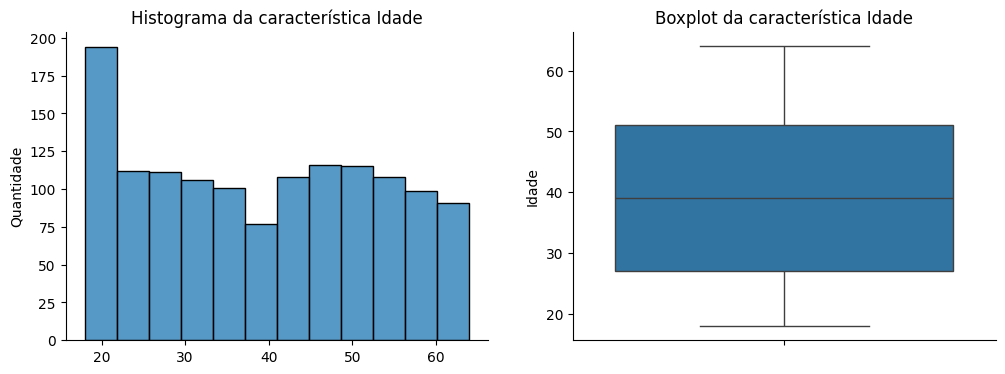

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df['Idade'], ax=ax1)
ax1.set_title('Histograma da característica Idade')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Idade'], ax=ax2)
ax2.set_title('Boxplot da característica Idade')
ax2.set_xlabel('')
ax2.set_ylabel('Idade')

sns.despine()
plt.show()

In [61]:
df['Idade'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Idade,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00


Podemos observar pelas visualizações que nossa caracteristica `Idade` parece bem distribuída na amostra

##### `Sexo`

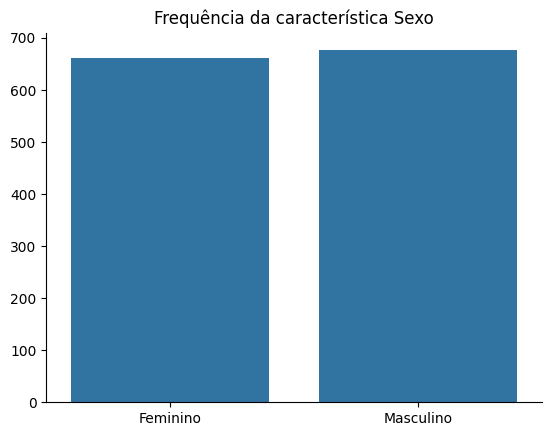

In [31]:
sns.countplot(df, x='Sexo')
plt.title('Frequência da característica Sexo')
plt.xlabel('')
plt.ylabel('')

sns.despine()
plt.show()

In [32]:
(round(df['Sexo'].value_counts(normalize=True),4)*100).to_frame().T

Sexo,Masculino,Feminino
proportion,50.52,49.48


Observamos que o gênero esta bem distribuido em nosso dataframe

##### `IMC`

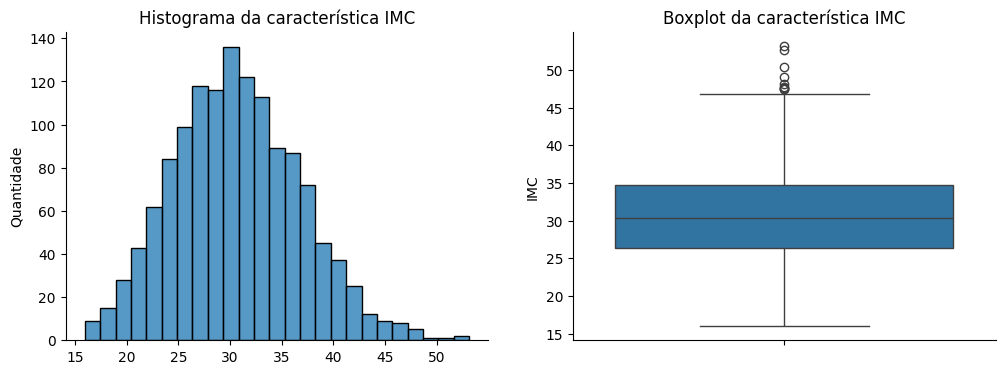

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df['IMC'], ax=ax1)
ax1.set_title('Histograma da característica IMC')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['IMC'], ax=ax2)
ax2.set_title('Boxplot da característica IMC')
ax2.set_xlabel('')
ax2.set_ylabel('IMC')

sns.despine()
plt.show()

In [34]:
df['IMC'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
IMC,1338.00,30.66,6.10,15.96,26.30,30.40,34.69,53.13


As visualizações da característica `IMC` nos mostra que:

- Há alguns valores outliers que não interferem muito na média
- A média (30,66) e mediana (30,40) estão bem proximas
- O histograma aparentemente segue uma distribuição normal

Podemos criar categorias para a variável

In [36]:
def classificar_imc(imc):
    if imc < 17:
        return 'Muito abaixo do peso'
    elif 17 <= imc < 18.5:
        return 'Abaixo do peso'
    elif 18.5 <= imc < 25:
        return 'Peso normal'
    elif 25 <= imc < 30:
        return 'Acima do peso'
    elif 30 <= imc < 35:
        return 'Obesidade I'
    elif 35 <= imc < 40:
        return 'Obesidade II'
    elif imc >= 40:
        return 'Obesidade III'
    else:
        return 'Fora do intervalo'
    
df['IMC_cat'] = df['IMC'].apply(classificar_imc)
df['IMC_cat'] = df['IMC_cat'].astype('category')
df.head()

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude,IMC_cat
0,19,Feminino,27.90,0,Sim,Centro,1688.49,Acima do peso
1,18,Masculino,33.77,1,Não,Sudeste,172.56,Obesidade I
2,28,Masculino,33.00,3,Não,Sudeste,444.95,Obesidade I
3,33,Masculino,22.70,0,Não,Norte,2198.45,Peso normal
4,32,Masculino,28.88,0,Não,Norte,386.69,Acima do peso


##### `IMC_cat`

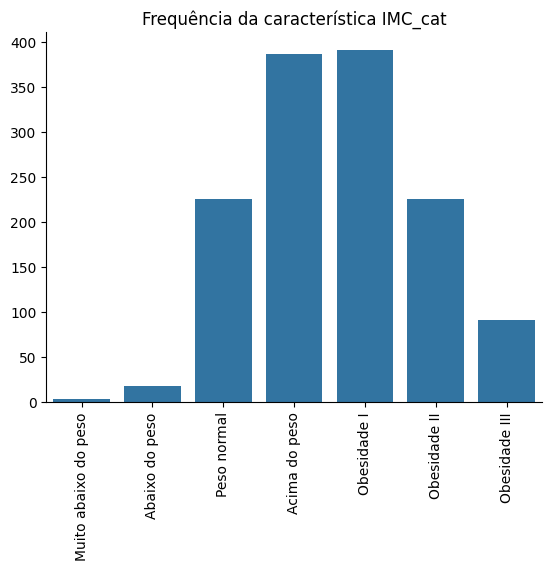

In [40]:
order = ['Muito abaixo do peso', 'Abaixo do peso', 'Peso normal', 'Acima do peso', 'Obesidade I', 'Obesidade II', 'Obesidade III']

sns.countplot(df, x='IMC_cat', order=order)
plt.title('Frequência da característica IMC_cat')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')

sns.despine()
plt.show()

In [65]:
(df['IMC_cat'].value_counts(normalize=True)*100).to_frame().T

IMC_cat,Obesidade I,Acima do peso,Obesidade II,Peso normal,Obesidade III,Abaixo do peso,Muito abaixo do peso
proportion,29.22,28.85,16.82,16.82,6.80,1.27,0.22


A maior parte dos nossos colaboradores se encontram acima do peso normal

##### `Qte_Filhos`

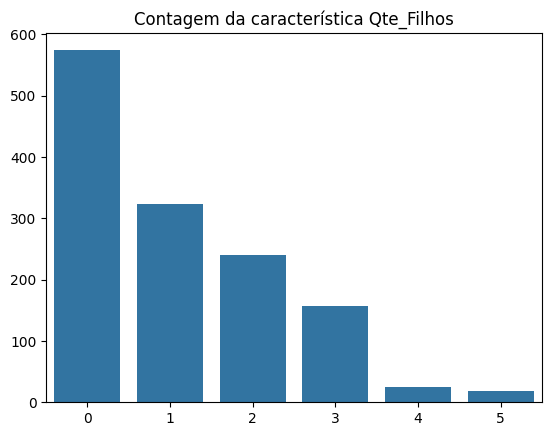

In [49]:
sns.countplot(df, x='Qte_Filhos')
plt.title('Contagem da característica Qte_Filhos')
plt.xlabel('')
plt.ylabel('')

plt.show()

In [64]:
(df['Qte_Filhos'].value_counts(normalize=True)*100).to_frame().T

Qte_Filhos,0,1,2,3,4,5
proportion,42.90,24.22,17.94,11.73,1.87,1.35


Observamos que 43% dos colaboradores da pesquisa não possuem filhos

##### `Fumante`

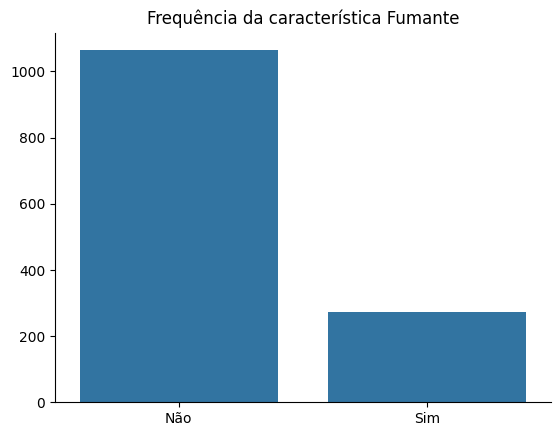

In [51]:
sns.countplot(df, x='Fumante')
plt.title('Frequência da característica Fumante')
plt.xlabel('')
plt.ylabel('')

sns.despine()
plt.show()

In [63]:
(df['Fumante'].value_counts(normalize=True)*100).to_frame().T

Fumante,Não,Sim
proportion,79.52,20.48


Quase 80% dos colaboradores da pesquisa se dizem não-fumantes

##### `Região`

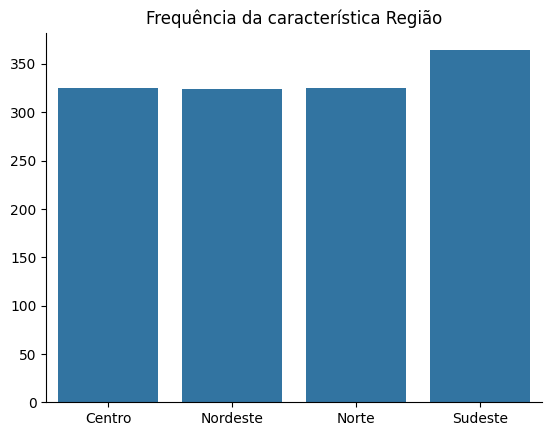

In [53]:
sns.countplot(df, x='Região')
plt.title('Frequência da característica Região')
plt.xlabel('')
plt.ylabel('')

sns.despine()
plt.show()

In [62]:
(df['Região'].value_counts(normalize=True)*100).to_frame().T

Região,Sudeste,Centro,Norte,Nordeste
proportion,27.20,24.29,24.29,24.22


Nossos colaboradores estão bem distribuídos entre 4 regiões

##### Característica alvo `Custo_Saude`

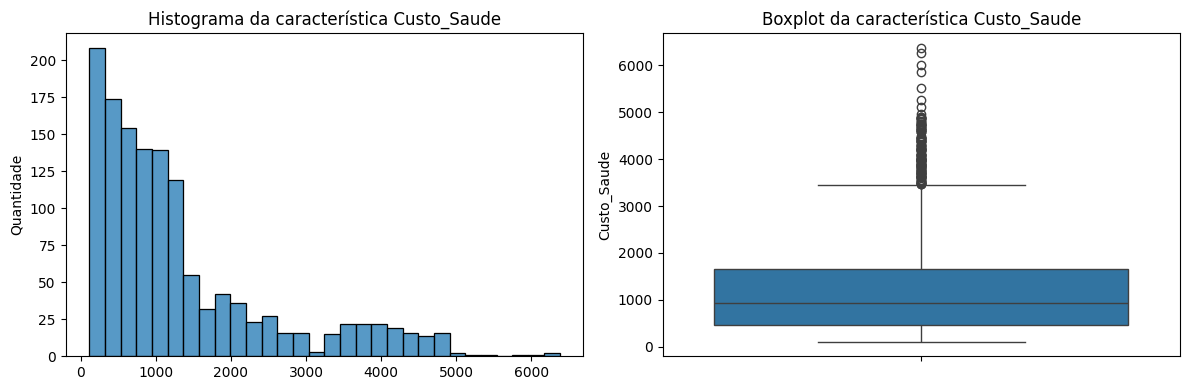

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df['Custo_Saude'], ax=ax1)
ax1.set_title('Histograma da característica Custo_Saude')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Custo_Saude'], ax=ax2)
ax2.set_title('Boxplot da característica Custo_Saude')
ax2.set_xlabel('')
ax2.set_ylabel('Custo_Saude')

plt.tight_layout()

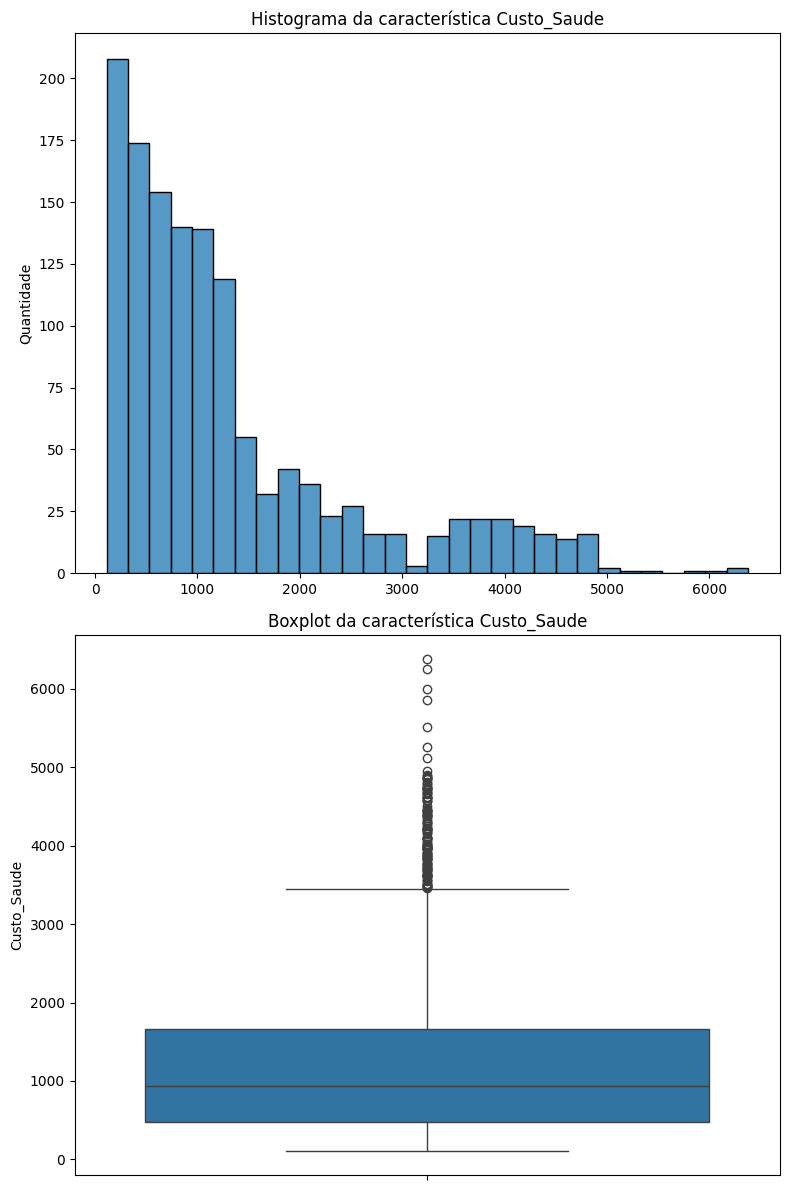

In [119]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,12))

sns.histplot(df['Custo_Saude'], ax=ax1)
ax1.set_title('Histograma da característica Custo_Saude')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Custo_Saude'], ax=ax2)
ax2.set_title('Boxplot da característica Custo_Saude')
ax2.set_xlabel('')
ax2.set_ylabel('Custo_Saude')

plt.tight_layout()

In [56]:
df['Custo_Saude'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Custo_Saude,1338.00,1327.04,1211.00,112.19,474.03,938.20,1663.99,6377.04


In [57]:
df['Custo_Saude'].sum().round(2)

1775582.5

Observamos uma grande quantidade de valores outliers na característica `Custo_Saude`

75% dos valores se concentram em até R$ 1.664,00, porém há muitos valores discrepantes chegando até a R$ 6.337,04.

O custo total de saúde dessa **amostra** é de **R$ 1.775.582,50**

#### Bivariada

Vamos utilizar de técnicas associativas para entender quais são as variáveis que mais se correlacionam com a nossa variável target (`Custo_Saude`)

##### `Custo_Saude` x Variaveis Quantitativas

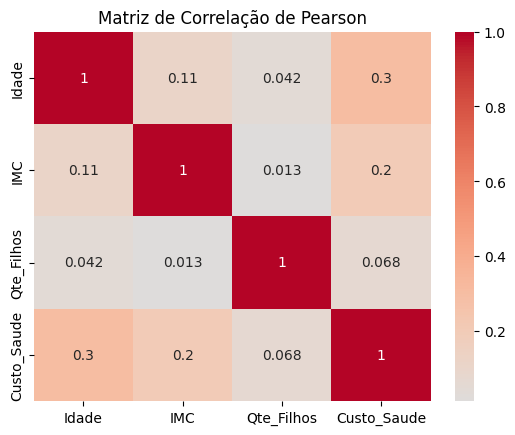

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, center=0, cmap='coolwarm', annot=True)
plt.title('Matriz de Correlação de Pearson')

plt.show()

Aparentemente, `Idade` e `IMC` tem um baixo relacionamento positivo com o `Custo_Saude`

##### `Custo_Saude` x `Idade`

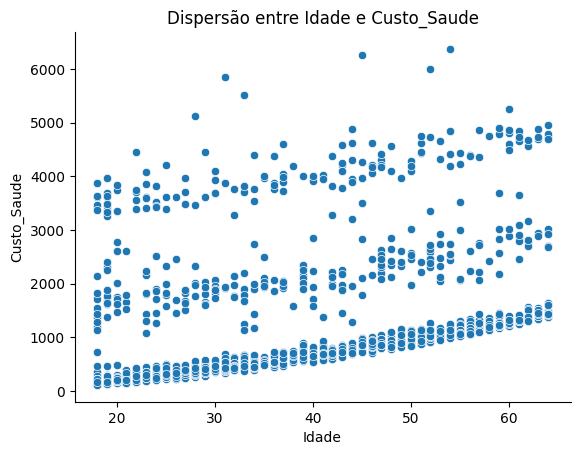

In [ ]:
sns.scatterplot(data=df, x='Idade', y='Custo_Saude')
plt.title('Dispersão entre Idade e Custo_Saude')

sns.despine()
plt.show()

Podemos observar que há "saltos" no custo de saúde, formando faixas.

##### `Custo_Saude` x `IMC`

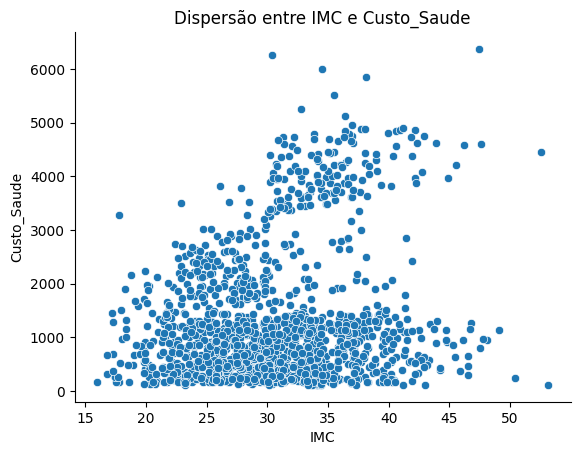

In [ ]:
sns.scatterplot(data=df, x='IMC', y='Custo_Saude')
plt.title('Dispersão entre IMC e Custo_Saude')

sns.despine()
plt.show()

Notamos que alguns pontos se encontram em um patamar acima do "normal"

##### `Custo_Saude` x Variaveis Qualitativas

Para as variáveis qualitativas utilizarei o Coeficiente de Determinação para avaliar o comportamento entre as variáveis.

Para isso, criarei uma função para calcular o Coeficiente de Determinação (R²) para otimizar nosso trabalho

In [80]:
def coef_determinacao(target, variable):
    grupo = df.groupby(variable)[target].count().to_frame()
    grupo['var'] = df.groupby(variable)[target].var()
    grupo.columns = ['n', 'var']
    var_ponderada = (grupo['n']*grupo['var']).sum()/df[target].count()
    r2 = round((1-(var_ponderada/df[target].var()))*100, 2)

    return r2

In [81]:
quali_col = df.select_dtypes(['object', 'category']).columns
variavel = []
valor = []

for col in df[quali_col]:
    r2 = coef_determinacao('Custo_Saude', col)
    valor.append(r2)
    variavel.append(col)

r2_df = pd.DataFrame({
    'Variavel': variavel,
    'R²': valor
})

r2_df.sort_values('R²', ascending=False)

,Variavel,R²
1,Fumante,61.92
3,IMC_cat,4.28
2,Região,0.44
0,Sexo,0.25


De acordo com o código acima, a variável `Fumante` esta muito correlacionada com `Custo_Saude` e variável `IMC_cat` também tem uma relevancia menor.

##### `Custo_Saude` x `IMC_cat`

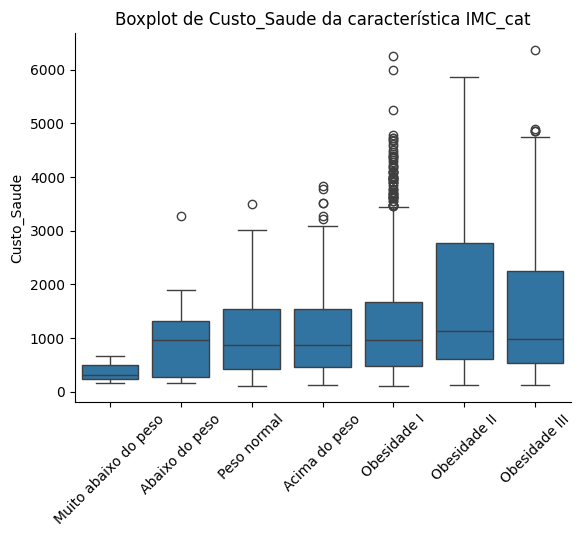

In [84]:
order=['Muito abaixo do peso', 'Abaixo do peso', 'Peso normal', 'Acima do peso', 'Obesidade I', 'Obesidade II', 'Obesidade III']

sns.boxplot(data=df, y='Custo_Saude', x='IMC_cat', order=order)
plt.title('Boxplot de Custo_Saude da característica IMC_cat')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Custo_Saude')

sns.despine()
plt.show()

In [85]:
df.groupby('IMC_cat')['Custo_Saude'].describe()

,count,mean,std,min,25%,50%,75%,max
IMC_cat,,,,,,,,
Abaixo do peso,17.00,973.77,804.29,162.13,277.52,964.43,1320.43,3273.42
Acima do peso,386.00,1098.75,803.95,125.24,466.79,865.94,1538.57,3824.56
Muito abaixo do peso,3.00,383.43,253.94,169.48,243.11,316.75,490.40,664.05
Obesidade I,391.00,1441.97,1357.32,113.15,474.47,956.30,1669.15,6259.29
Obesidade II,225.00,1702.23,1517.15,114.14,598.95,1126.45,2772.43,5857.11
Obesidade III,91.00,1678.46,1665.82,114.68,541.99,974.89,2246.82,6377.04
Peso normal,225.00,1040.93,750.56,112.19,413.41,860.38,1535.91,3506.94


Podemos notar que a média e a variação de custo para os grupos com Obesidade I, II e III são bem maiores do que o resto da população.

##### `Custo_Saude` x `Fumante`

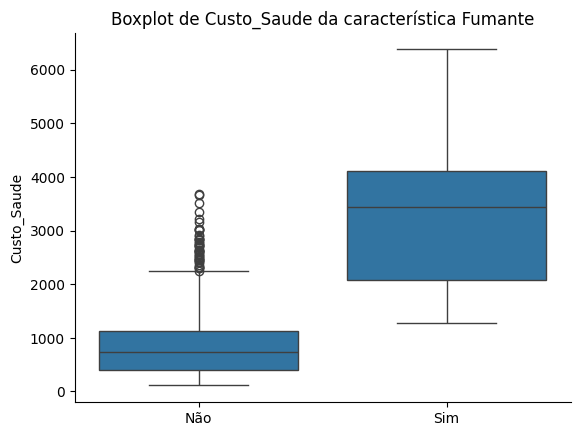

In [86]:
sns.boxplot(data=df, y='Custo_Saude', x='Fumante')
plt.title('Boxplot de Custo_Saude da característica Fumante')
plt.xlabel('')
plt.ylabel('Custo_Saude')

sns.despine()
plt.show()

In [87]:
df.groupby('Fumante')['Custo_Saude'].describe()

,count,mean,std,min,25%,50%,75%,max
Fumante,,,,,,,,
Não,1064.00,843.43,599.38,112.19,398.64,734.54,1136.29,3691.06
Sim,274.00,3205.02,1154.15,1282.95,2082.62,3445.63,4101.92,6377.04


Podemos perceber um aumento significativo nos custos dos colaboradores que são fumantes em relação aos não-fumantes.

#### Análise Multivariada

Para entender como essas variáveis interagem entre si, criarei uma Regressão Linear Multipla

Para isso, precisamos criar variaveis dummies para as variaveis categoricas relevantes analisadas anteriormente

In [82]:
df['D_Fumante'] = df['Fumante'].apply(lambda x: 1 if x == 'Sim' else 0)
df['D_Obeso'] = df['IMC'].apply(lambda x: 1 if x >= 30 else 0)
df.head()

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude,IMC_cat,D_Fumante,D_Obeso
0,19,Feminino,27.90,0,Sim,Centro,1688.49,Acima do peso,1,0
1,18,Masculino,33.77,1,Não,Sudeste,172.56,Obesidade I,0,1
2,28,Masculino,33.00,3,Não,Sudeste,444.95,Obesidade I,0,1
3,33,Masculino,22.70,0,Não,Norte,2198.45,Peso normal,0,0
4,32,Masculino,28.88,0,Não,Norte,386.69,Acima do peso,0,0


Vamos criar uma regressão linear multipla

In [88]:
# Definindo variáveis independentes e dependentes
X = df[['Idade', 'D_Obeso', 'D_Fumante']]
Y = df['Custo_Saude']

# Adicionando uma constante para o intercepto
X = sm.add_constant(X)

# Ajustando o modelo
model = sm.OLS(Y, X).fit()

# Resumo dos resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Custo_Saude   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1342.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:36:12   Log-Likelihood:                -10467.
No. Observations:                1338   AIC:                         2.094e+04
Df Residuals:                    1334   BIC:                         2.096e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -410.2391     51.769     -7.924      0.0

Pelo resultado da regressão, podemos observar que os fumantes influenciam muito no custo de saúde da empresa.

Vamos plotar os graficos entre as três variáveis para observar melhor suas interações

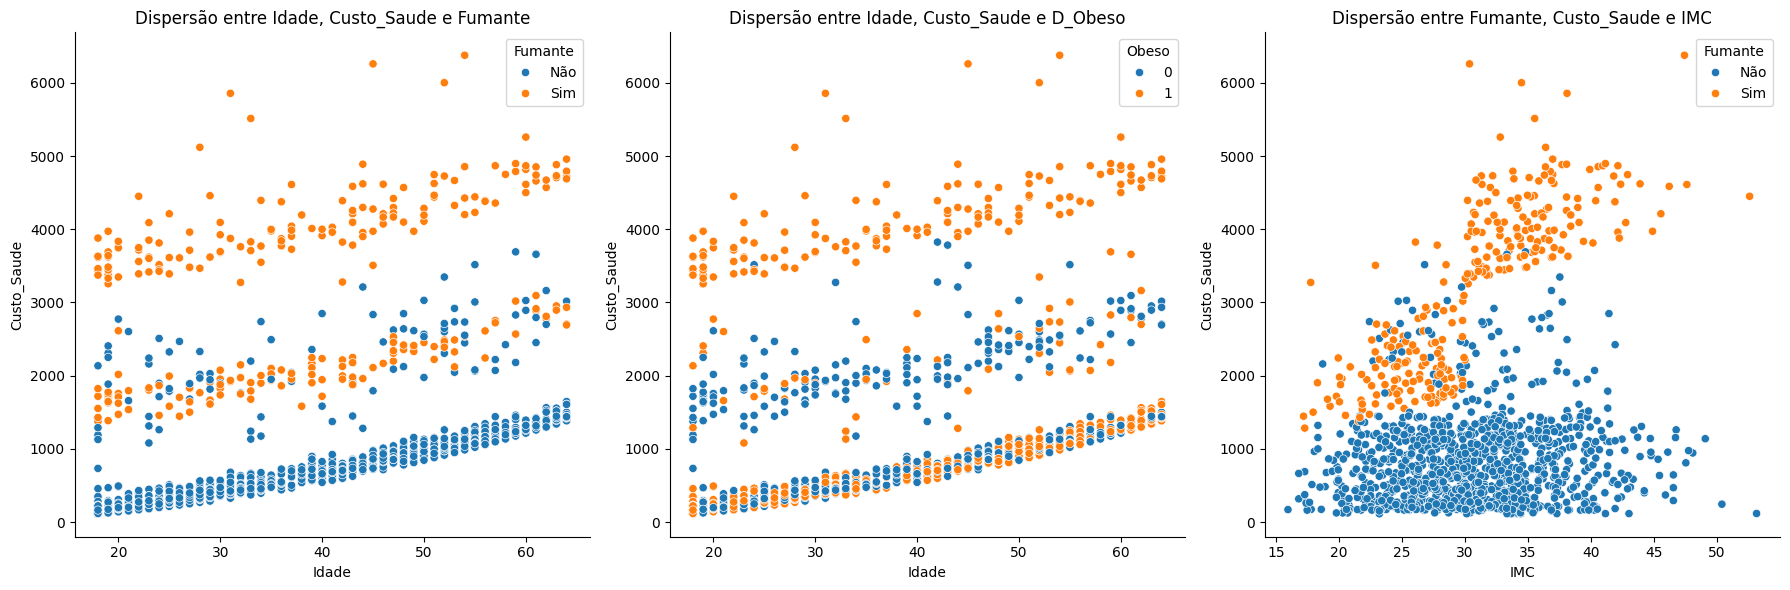

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

sns.scatterplot(data=df, x='Idade', y='Custo_Saude', hue='Fumante', ax=ax1)
ax1.set_title('Dispersão entre Idade, Custo_Saude e Fumante')

sns.scatterplot(data=df, x='Idade', y='Custo_Saude', hue='D_Obeso', ax=ax2)
ax2.set_title('Dispersão entre Idade, Custo_Saude e D_Obeso')
ax2.legend(title="Obeso")

sns.scatterplot(data=df, x='IMC', y='Custo_Saude', hue='Fumante', ax=ax3)
ax3.set_title('Dispersão entre Fumante, Custo_Saude e IMC')

sns.despine()
plt.tight_layout()
plt.show()

Com os gráficos plotados, podemos ver as diferenças dos patamares vistos anteriormente e entender como elas se relacionam entre si